### Import main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import joblib
import missingno

### Loading the dataset and looking at the big picture

In [2]:
file_path = os.path.join(os.getcwd(), 'housing.csv')
df_housing = pd.read_csv(file_path)
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# let's check some info about the dataset (check for datatypes ans null values)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# we check the dataset statistics
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# we check for nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot: >

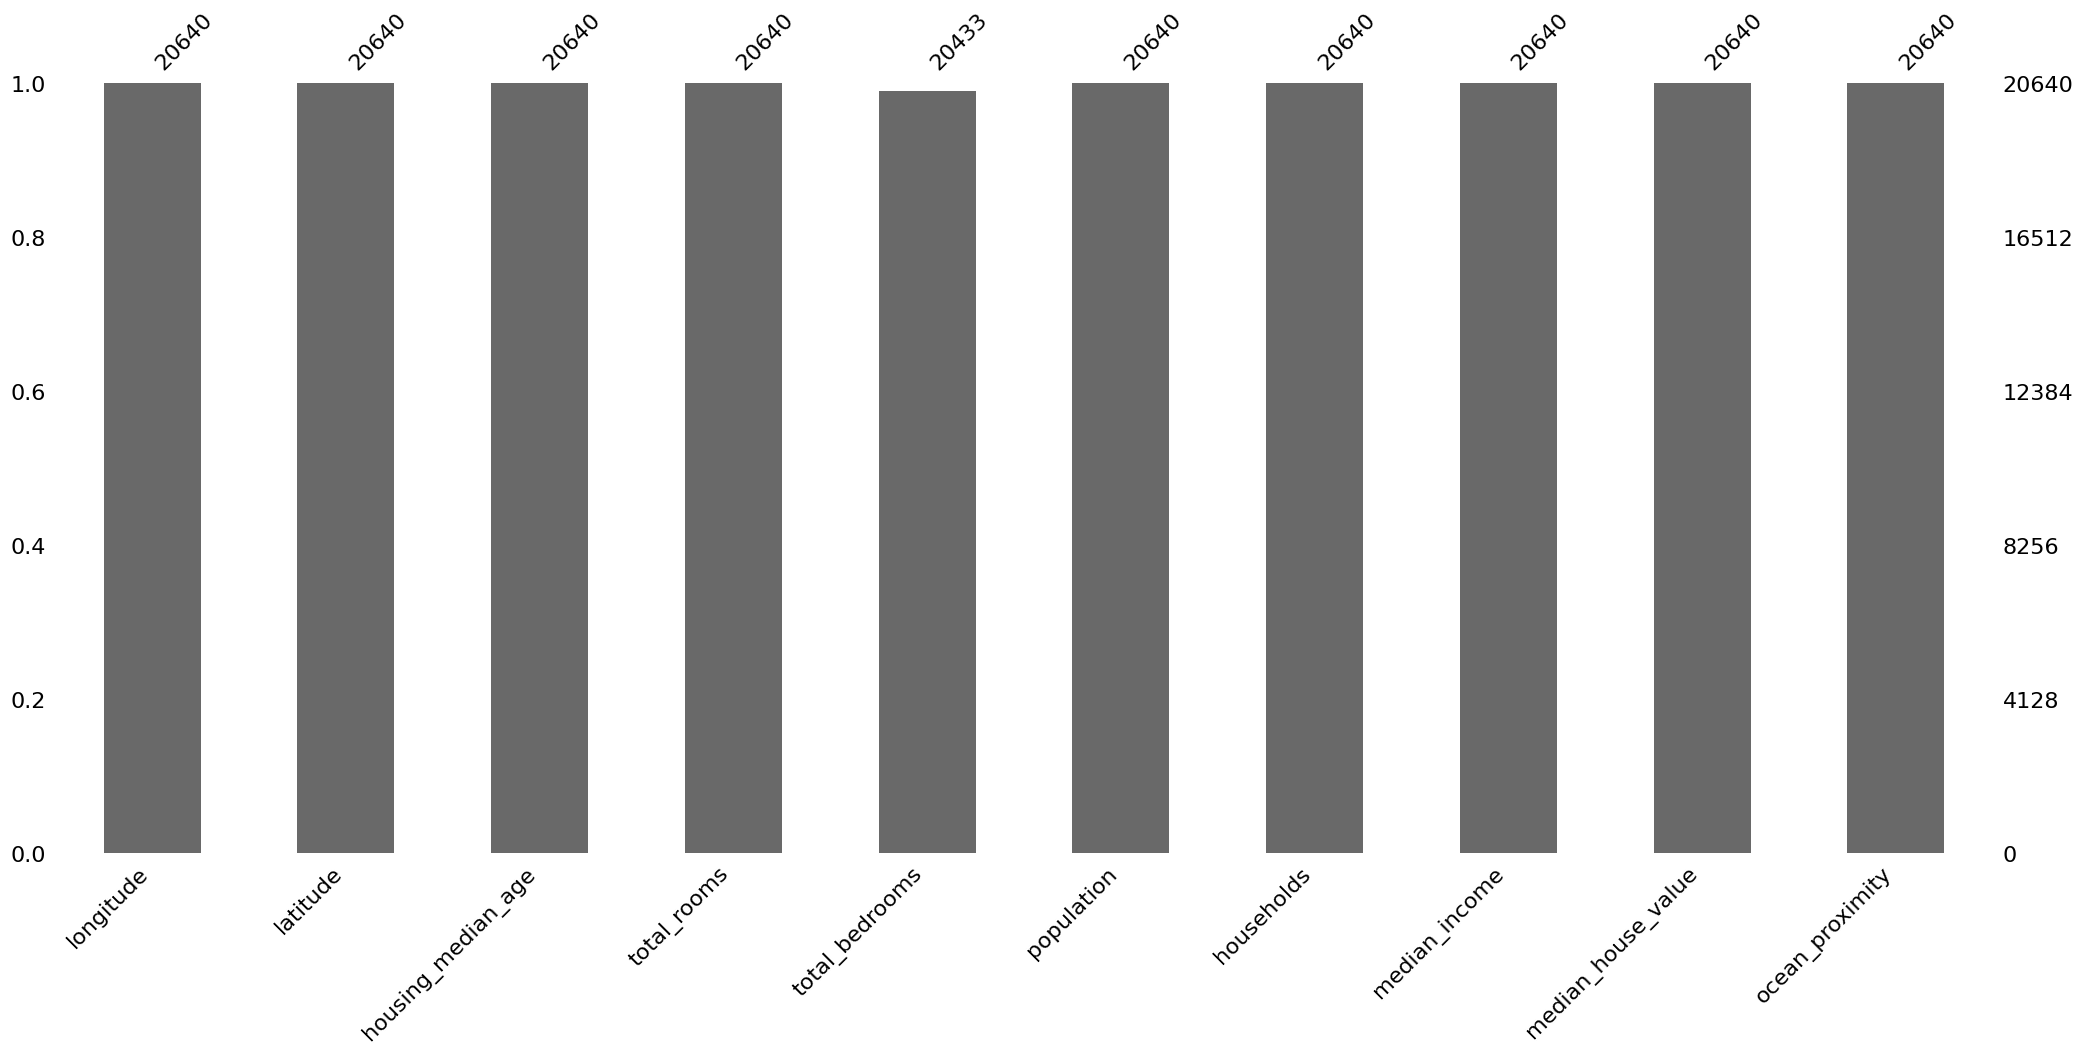

In [6]:
# we check the nulls using missingno library
missingno.bar(df_housing)

#### Comment: it seems that the dataset has 20640 instances, with 207 missing values in total_bedrooms, also all the datatypes are float64 as they are continuous numerical features except for ocean_proximity with is a nominal categorical feature.

### Exploratory Data Analysis

### Univariate Visualization

In [7]:
ocean_values = df_housing['ocean_proximity'].unique()
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
#let's get these values in an descending order so we can get the countplot in a descending order
counts = df_housing['ocean_proximity'].value_counts()
counts.index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

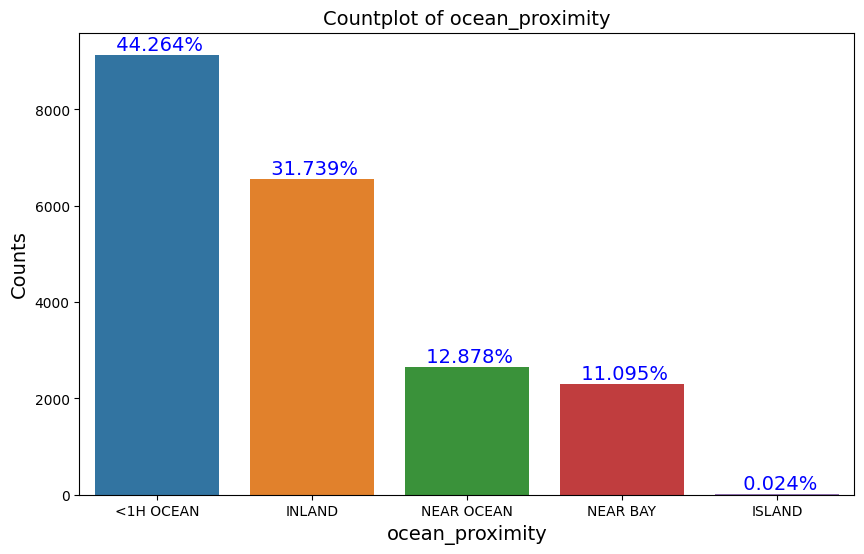

In [9]:
#plotting
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity', data=df_housing , order=counts.index)
plt.title('Countplot of ocean_proximity', fontsize=14, c='k')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

# if we wanna show the percentage #### to be reivsed
for i in range(len(counts)):
    each_count = counts.values[i]
    each_text = f'{each_count*100/len(df_housing): .3f}%'
    plt.text(x=i, y=each_count+100, s=each_text, ha='center', c='b', fontsize=14) ## y is the altitude of the percentages

In [10]:
# change <1H OCEAN to 1H OCEAN because it will give us errors later
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

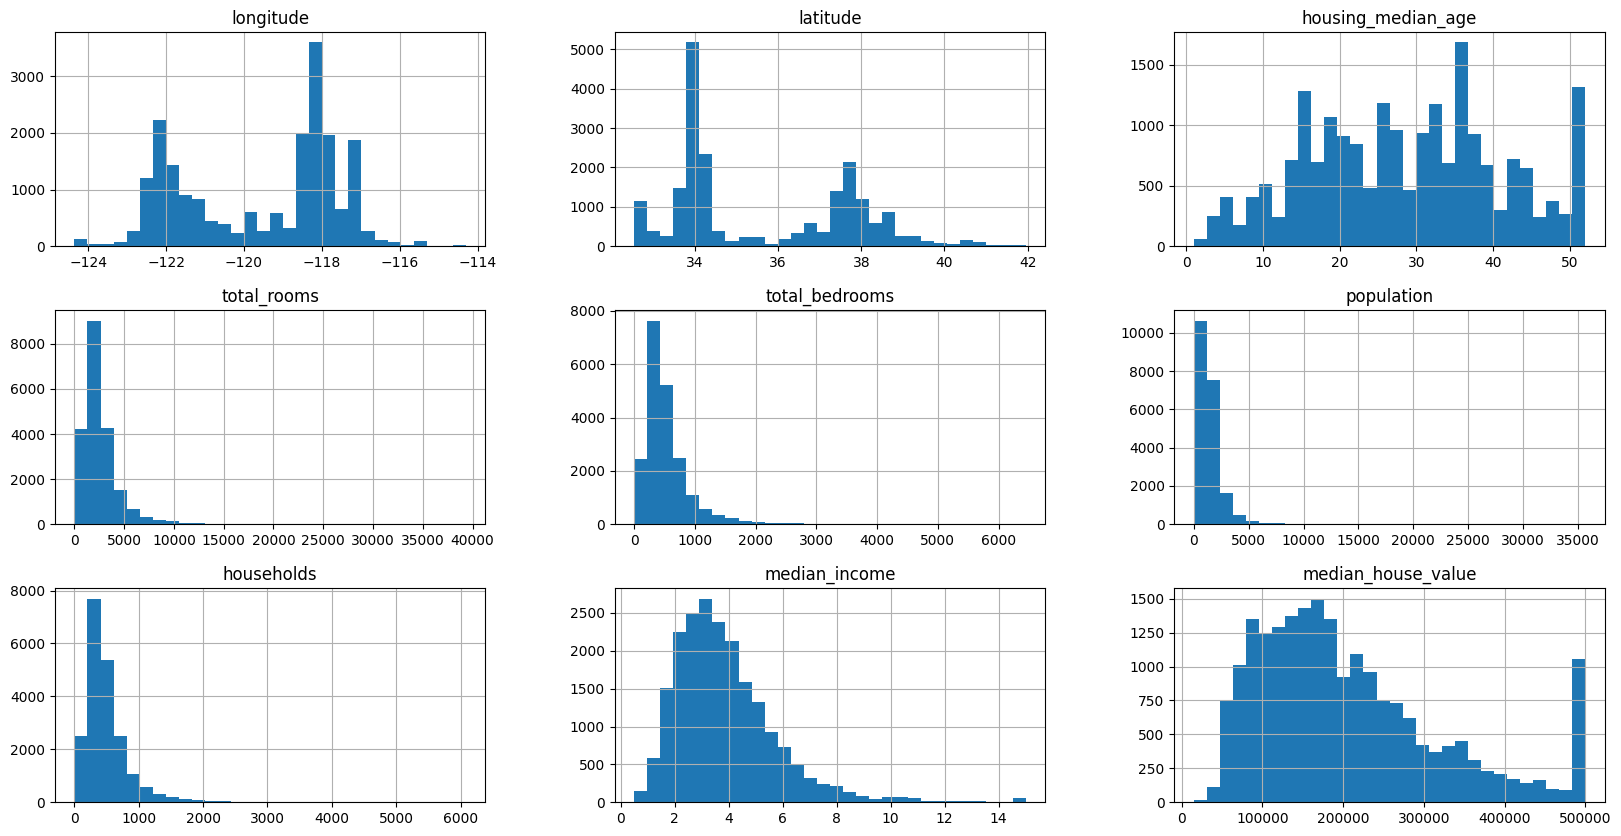

In [11]:
# histogram Distribution of the numerical values
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

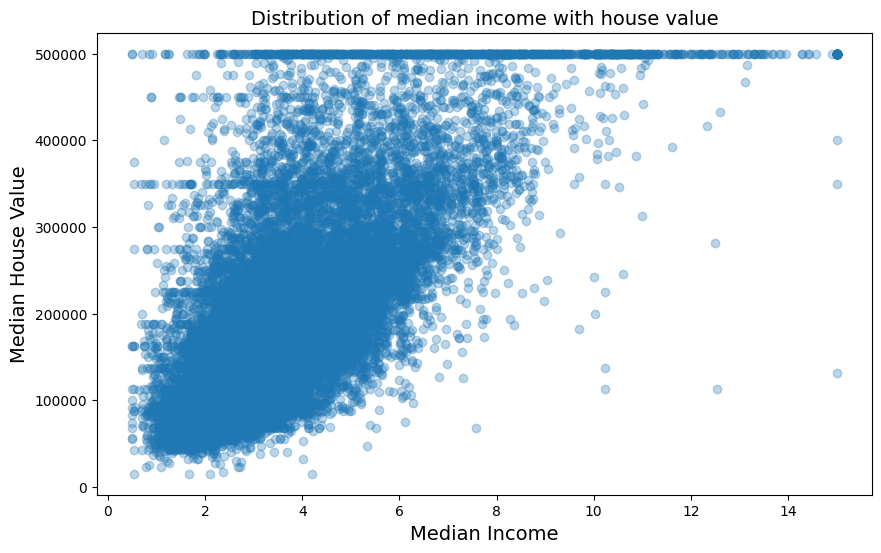

In [12]:
# scatter plot of the importante feature Median_income with the target median_house_value
plt.figure(figsize=(10,6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.3)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

#### from the scatter plot we can see that the mediam income is strongly correlated with the median house value

In [13]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [14]:
# we can create ranges/bins from these values
house_value_bins = pd.cut(df_housing['median_house_value'], bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
      labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k<'])
house_value_bins

0        400k-500k
1        300k-400k
2        300k-400k
3        300k-400k
4        300k-400k
           ...    
20635       0-100k
20636       0-100k
20637       0-100k
20638       0-100k
20639       0-100k
Name: median_house_value, Length: 20640, dtype: category
Categories (6, object): ['0-100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '500k<']

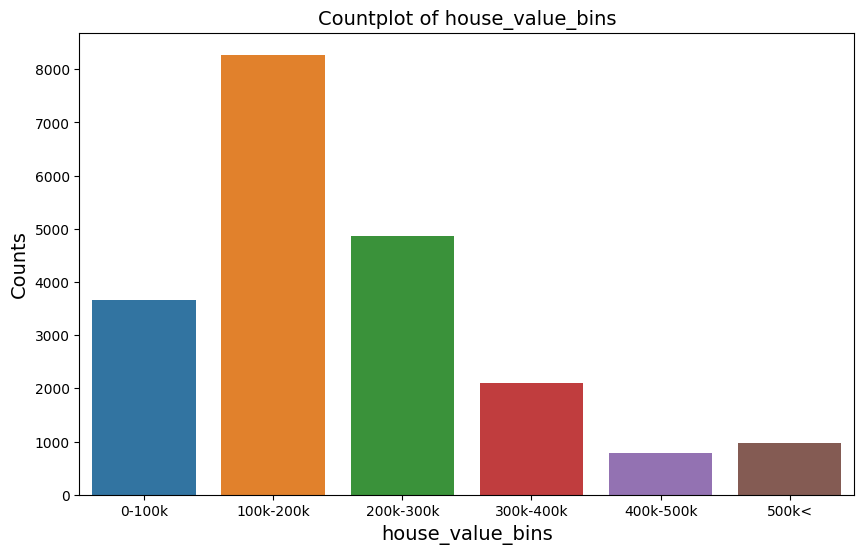

In [15]:
# let's plot these bins, let's use countplot
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('Countplot of house_value_bins', fontsize=14, c='k')
plt.xlabel('house_value_bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [16]:
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [17]:
# let's run the median_income feature through the same process
median_income_bins = pd.cut(df_housing['median_income'], bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf],
      labels=['0-1.5', '1,5-3', '3-4.5', '4.5-6', '6<'])
median_income_bins

0           6<
1           6<
2           6<
3        4.5-6
4        3-4.5
         ...  
20635    1,5-3
20636    1,5-3
20637    1,5-3
20638    1,5-3
20639    1,5-3
Name: median_income, Length: 20640, dtype: category
Categories (5, object): ['0-1.5' < '1,5-3' < '3-4.5' < '4.5-6' < '6<']

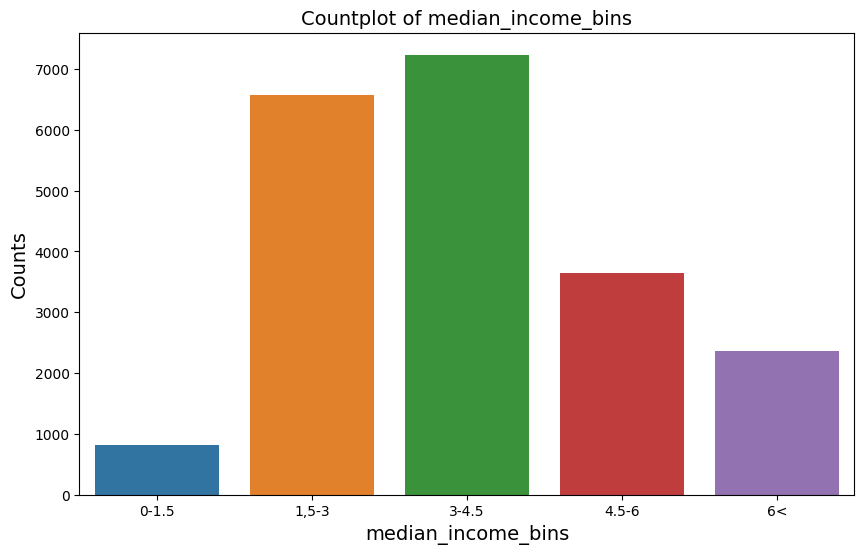

In [18]:
# plotting
plt.figure(figsize=(10,6))
sns.countplot(x=median_income_bins)
plt.title('Countplot of median_income_bins', fontsize=14, c='k')
plt.xlabel('median_income_bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

#### Comment: It seems that the (<1H ocean) is about  half of the dataset, the data is biased to this category, someone can think to split the data according to this column using (startified) method as we found that this column is very important,  Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income), but using (income_bins) as the stratified method requires categorical features not numerical.

### Bivaiate Visualization

<Figure size 1000x600 with 0 Axes>

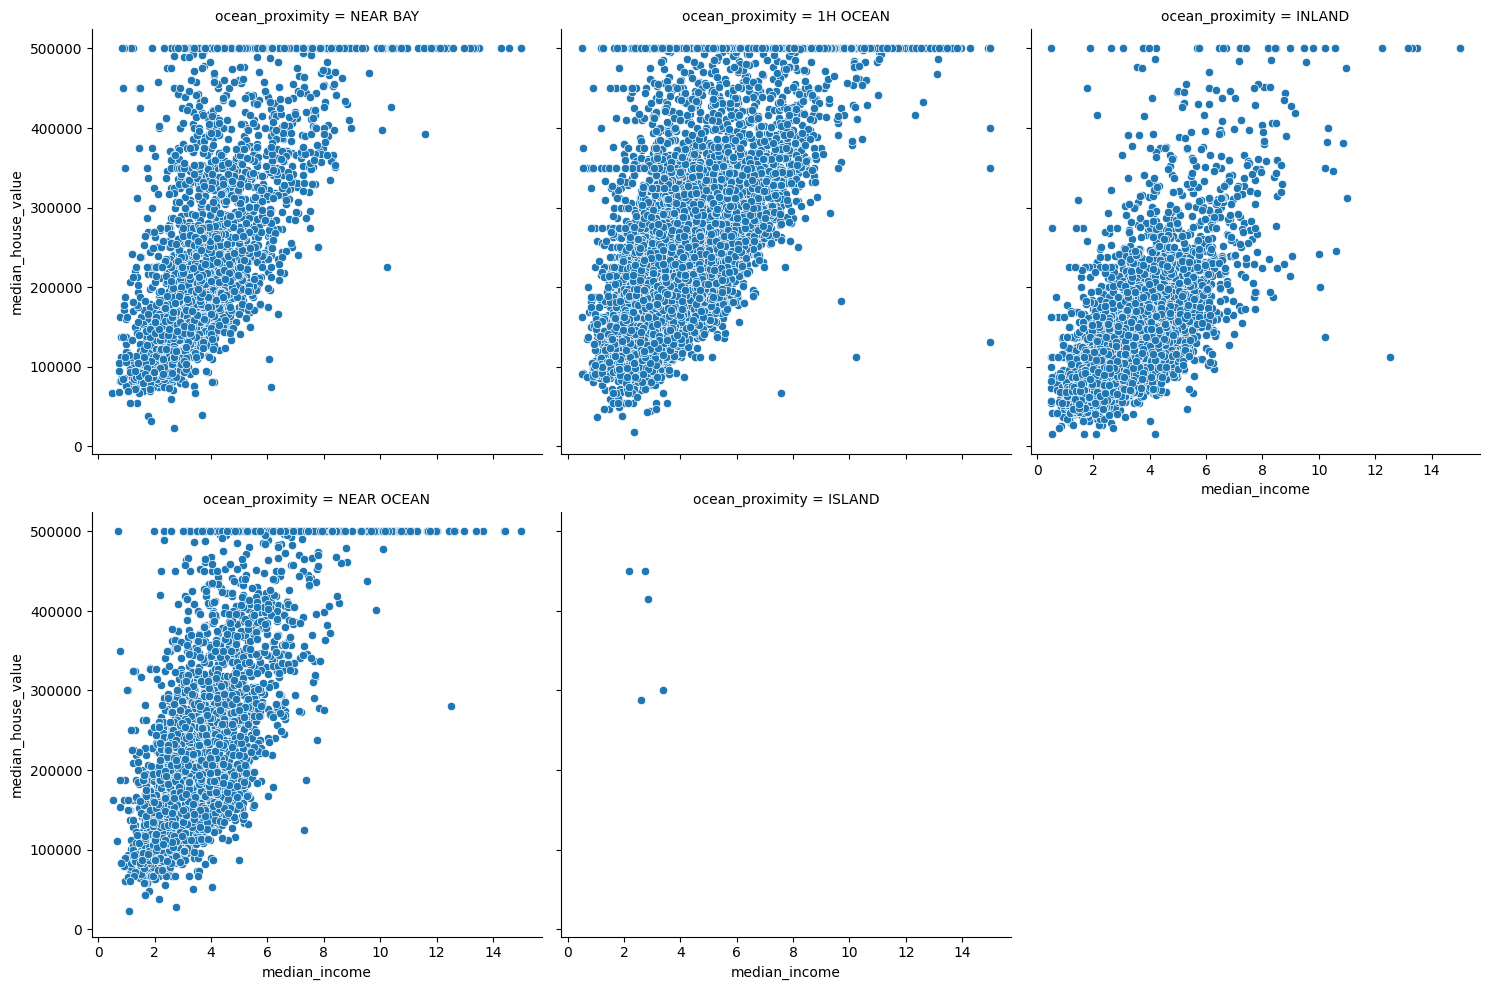

In [19]:
# scatterplot of Median_income and Median_house_value at each ocean_proximity
plt.figure(figsize=(10,6))
sns.relplot(x='median_income', y='median_house_value', data=df_housing, col='ocean_proximity', kind='scatter', col_wrap=3)
plt.show()

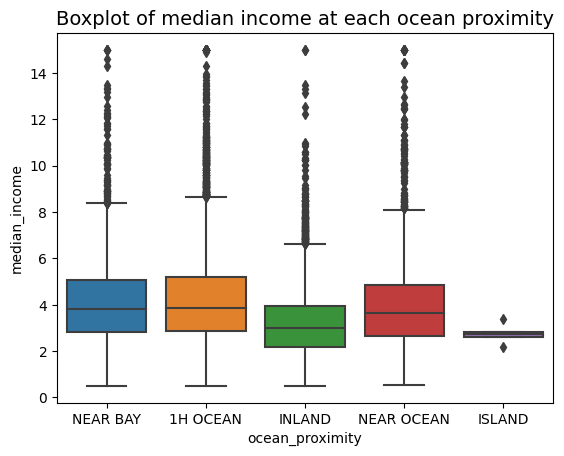

In [20]:
# let's plot a boxplot of median_income at each ocean_proximity
sns.boxplot(y='median_income', data=df_housing, x= 'ocean_proximity')
plt.title('Boxplot of median income at each ocean proximity', fontsize=14, c='k')
plt.show()

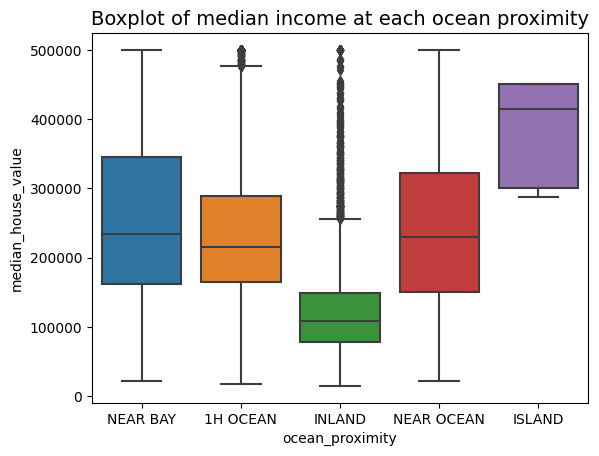

In [21]:
# let's plot a boxplot of median_house_value at each ocean_proximity
sns.boxplot(y='median_house_value', data=df_housing, x= 'ocean_proximity')
plt.title('Boxplot of median income at each ocean proximity', fontsize=14, c='k')
plt.show()

#### comment: it seems that the distribution of median_income is almost the same at each ocean_proximity categories, it also seems that the inland categorie is less than the other categories.

### Multivarate Visualization

In [22]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


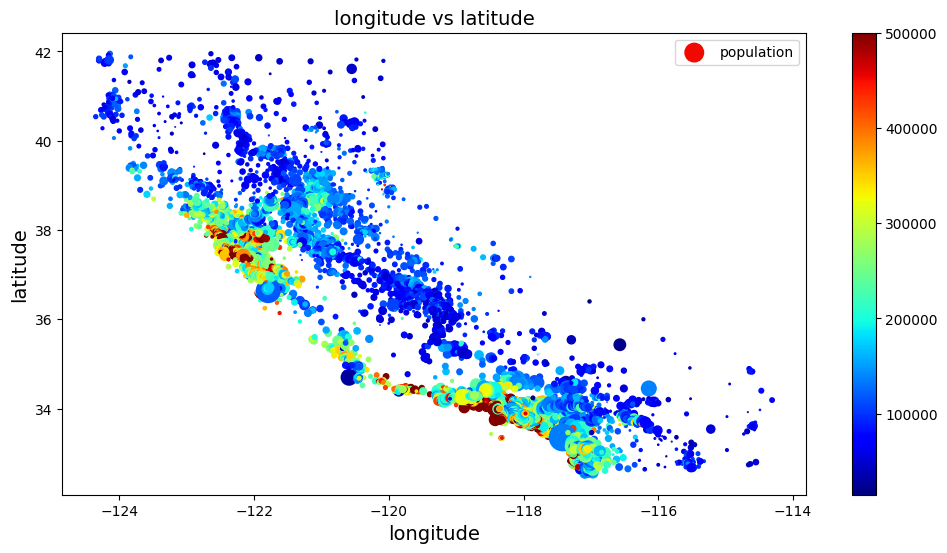

In [23]:
plt.figure(figsize=(12,6))
sc = plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], s=df_housing['population']/100,
           c=df_housing['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)   # to get the color bar on the side
plt.xlabel('longitude', fontsize=14, c='k')
plt.ylabel('latitude', fontsize=14, c='k')
plt.title('longitude vs latitude', fontsize=14, c='k')
plt.legend()
plt.show()

### Checking the correlation between the features and the target

In [24]:
# using pearson correlation
df_housing.corr()

C:\Users\1AALI\AppData\Local\Temp\ipykernel_5612\4083967113.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


C:\Users\1AALI\AppData\Local\Temp\ipykernel_5612\1008569104.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')


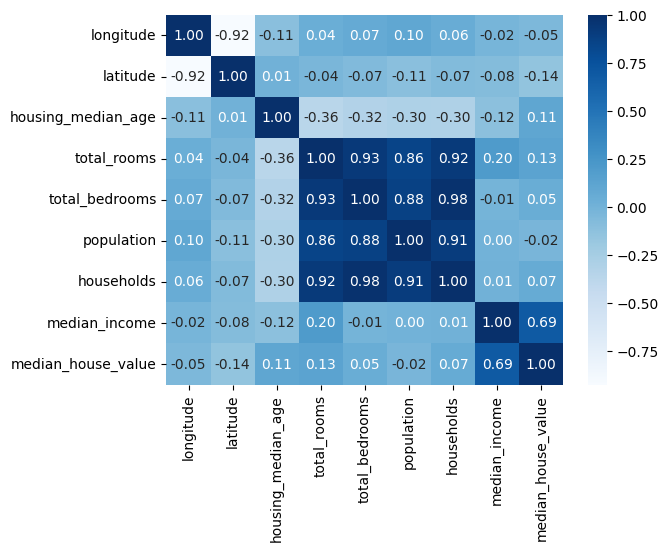

In [25]:
# we can get a heatmap of this correlation
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [26]:
# we can get the correlation of just median_house_value with each other feature
df_housing.corr()['median_house_value'].sort_values(ascending=False)

C:\Users\1AALI\AppData\Local\Temp\ipykernel_5612\4103633190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Comment: it seems that the correlated feature with the target is median_income, as predicted, features like households and popupaltion are less correlated with the target


### Feature Engeneering
let's try and add some features to see if they can be more correlated to the target

In [27]:
# Feature Engineering => Feature extraction => Add new columns to the main DataFrame
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [28]:
# let's the correlation of median_house_income now
df_housing.corr()['median_house_value'].sort_values(ascending=False)

C:\Users\1AALI\AppData\Local\Temp\ipykernel_5612\4024536689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_rooms             -0.255880
Name: median_house_value, dtype: float64

Comment: we can see that some of the new created features have better correlations compared to the old features

### Splitting the dataset

In [29]:
# splitting the data using the normal method (random method) and not the stratified method
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [30]:
# we split the dataset to target and features
x = df_housing.drop(columns='median_house_value', axis=1)
y= df_housing['median_house_value']

In [31]:
x.shape

(20640, 12)

In [32]:
y.shape

(20640,)

In [33]:
# let's split using random method
import sklearn
from sklearn.model_selection import train_test_split

In [34]:
# random split of dataset to two sets(train_set, test_set)
# for validation we'll use cross validation
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.15, random_state=42)

#let's check the shapes of these sets
print('x_train shape --', x_train.shape)
print('x_test shape --', x_test.shape)
print('y_train shape --', y_train.shape)
print('y_test shape --', y_test.shape)

x_train shape -- (17544, 12)
x_test shape -- (3096, 12)
y_train shape -- (17544,)
y_test shape -- (3096,)


### Data processing

### Dealing with nulls

In [35]:
# seperating the columns according to their type (numerical or categorical)
num_cols = [col for col in x_train.columns if x_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in x_train.columns if x_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]
categ_cols

['ocean_proximity']

In [36]:
# imputing the nulls using the median ==> using Simpleimputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# the imputer needs to learn, we'll use the functions fit, transform and fit_transform
# let's teach it using the fit function
imputer.fit(x_train[num_cols])

SimpleImputer(strategy='median')

In [37]:
# let's get the medians of each feature
imputer.statistics_

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        5.23456397e+00,  2.02876796e-01,  2.81793691e+00])

In [38]:
x_train[num_cols].median(axis=0)

longitude                   -118.510000
latitude                      34.265000
housing_median_age            29.000000
total_rooms                 2131.000000
total_bedrooms               437.000000
population                  1168.000000
households                   410.500000
median_income                  3.540900
rooms_per_household            5.234564
bedrooms_rooms                 0.202877
population_per_household       2.817937
dtype: float64

#### Comment: we obtained the same medians, which means our imputer has learned using the fit fonction.

In [39]:
# let's check if we still have any nulls or are they replaced with the medians
x_train_filled = imputer.transform(x_train[num_cols])
x_train_filled

array([[-118.27      ,   34.05      ,   12.        , ...,    1.46575342,
           0.61308411,    3.27123288],
       [-118.03      ,   33.97      ,   32.        , ...,    5.15240084,
           0.22366288,    2.48434238],
       [-121.26      ,   37.88      ,   42.        , ...,    5.        ,
           0.2       ,    2.75268817],
       ...,
       [-118.38      ,   34.03      ,   36.        , ...,    3.98671727,
           0.27082342,    3.33206831],
       [-121.96      ,   37.58      ,   15.        , ...,    6.39534884,
           0.16699301,    3.17889088],
       [-122.42      ,   37.77      ,   52.        , ...,    3.40257649,
           0.31116895,    2.10869565]])

In [40]:
x_test_filled = imputer.transform(x_test[num_cols]) # we never use the fit function nor the fit_transform on the test set
x_test_filled

array([[-119.01      ,   36.06      ,   25.        , ...,    4.19220056,
           0.2028768 ,    3.87743733],
       [-119.46      ,   35.14      ,   30.        , ...,    5.03938356,
           0.2028768 ,    2.67979452],
       [-122.44      ,   37.8       ,   52.        , ...,    3.97715472,
           0.2028768 ,    1.36033229],
       ...,
       [-119.18      ,   34.21      ,   46.        , ...,    4.39658849,
           0.23472357,    3.24520256],
       [-117.41      ,   34.23      ,   17.        , ...,    6.30496454,
           0.14735658,    3.11347518],
       [-117.9       ,   34.13      ,   37.        , ...,    4.23764706,
           0.23431427,    3.68      ]])

In [41]:
# we can also use the fit_transform funtion
x_train_filled1 = imputer.fit_transform(x_train[num_cols])
x_train_filled1

array([[-118.27      ,   34.05      ,   12.        , ...,    1.46575342,
           0.61308411,    3.27123288],
       [-118.03      ,   33.97      ,   32.        , ...,    5.15240084,
           0.22366288,    2.48434238],
       [-121.26      ,   37.88      ,   42.        , ...,    5.        ,
           0.2       ,    2.75268817],
       ...,
       [-118.38      ,   34.03      ,   36.        , ...,    3.98671727,
           0.27082342,    3.33206831],
       [-121.96      ,   37.58      ,   15.        , ...,    6.39534884,
           0.16699301,    3.17889088],
       [-122.42      ,   37.77      ,   52.        , ...,    3.40257649,
           0.31116895,    2.10869565]])

### Standardizing the Features

In [42]:
# using StandardScaler for each feature to be (mean=0 , std=1)
# this technique help for better training and to converge faster and pull all the features on the same scale
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(x_train_filled)

x_train_scaled = scaler.transform(x_train_filled)
x_test_scaled = scaler.transform(x_test_filled)

In [43]:
scaler.mean_

array([-1.19581640e+02,  3.56432091e+01,  2.85830483e+01,  2.63827776e+03,
        5.38051699e+02,  1.42623353e+03,  4.99773313e+02,  3.87451445e+00,
        5.43589847e+00,  2.12891898e-01,  3.08818392e+00])

In [44]:
x_train_filled.mean(axis=0)

array([-1.19581640e+02,  3.56432091e+01,  2.85830483e+01,  2.63827776e+03,
        5.38051699e+02,  1.42623353e+03,  4.99773313e+02,  3.87451445e+00,
        5.43589847e+00,  2.12891898e-01,  3.08818392e+00])

In [45]:
## for std
scaler.scale_

array([2.00549731e+00, 2.13673849e+00, 1.26079583e+01, 2.17454255e+03,
       4.18376995e+02, 1.13436104e+03, 3.80732950e+02, 1.89541311e+00,
       2.53486770e+00, 5.79626516e-02, 1.12343237e+01])

In [46]:
x_train_filled.std(axis=0)

array([2.00549731e+00, 2.13673849e+00, 1.26079583e+01, 2.17454255e+03,
       4.18376995e+02, 1.13436104e+03, 3.80732950e+02, 1.89541311e+00,
       2.53486770e+00, 5.79626516e-02, 1.12343237e+01])

In [47]:
# we can do all this at once using Pipeline
from sklearn.pipeline import Pipeline
num_Pipeline = Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
               ('Scaler', StandardScaler())
               ])
# Dealing with (num_pipeline) as an instance - fit and trasform to train the dataset, then just transform the other datasets
x_train_num = num_Pipeline.fit_transform(x_train[num_cols]) #train 
x_test_num = num_Pipeline.transform(x_test[num_cols]) #test

In [48]:
## now for categorical variables we need to do some encoding first.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb_encoder = LabelEncoder()
np.unique(x_train[categ_cols])

array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [49]:
lb_encoder.fit(np.squeeze(x_train[categ_cols].values)) # np.squeeze is use to change 2D array into 1D array

LabelEncoder()

In [50]:
X_train_encoded = lb_encoder.transform(np.squeeze(x_train[categ_cols].values)) # let the train set to learn and transform
X_test_encoded = lb_encoder.transform(np.squeeze(x_test[categ_cols].values)) # we only transform the test set, never train

In [51]:
X_test_encoded

array([1, 1, 3, ..., 4, 1, 0])

#### the LabelEncoder turned categorical values into numerical values, which is what we want, the only problem whith this method is that sometimes our model gets confused and treat the higher values as they have higher impact.

In [52]:
# let's try OneHotEncoder 
ohe = OneHotEncoder()
ohe.fit(x_train[categ_cols].values)

X_train_encoded = ohe.transform(x_train[categ_cols].values) # let the train set to learn and transform
X_test_encoded = ohe.transform(x_test[categ_cols].values) # we only transform the test set, never train

In [53]:
X_test_encoded

<3096x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3096 stored elements in Compressed Sparse Row format>

In [54]:
# to transform this sparse matrix into array
X_test_encoded.toarray() # or we can passe into the OneHotEncoder the sparse=False

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### or we can create a Pipeline for categorical varuables
we use OHE, it is preferable to use OneHotEncoder for the features, while for the target we must only Encode using LabelEncoder, except in Deep Learning we can use OHE for the target.

In [55]:
# Define Pipeline for Categorical columns => use OneHotEncoder
categ_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(sparse=False))
])

# we deal with the categorical Pipeline as an instance, we fit and transform the train set and transform only for test set
X_train_categ = categ_pipeline.fit_transform(x_train[categ_cols]) # lets the train set to learn and transform
X_test_categ = categ_pipeline.transform(x_test[categ_cols]) # we only transform the test set, never train

In [56]:
X_train_categ

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
x_train_num

array([[ 0.65402254, -0.74562661, -1.3152842 , ..., -1.56621391,
         6.90431171,  0.01629372],
       [ 0.77369361, -0.78306685,  0.27101546, ..., -0.11183923,
         0.18582633, -0.0537497 ],
       [-0.83687948,  1.04682484,  1.06416529, ..., -0.17196104,
        -0.22241733, -0.02986346],
       ...,
       [ 0.5991733 , -0.75498667,  0.58827539, ..., -0.57169895,
         0.99946289,  0.02170886],
       [-1.18592009,  0.90642394, -1.07733925, ...,  0.37850116,
        -0.79187011,  0.00807409],
       [-1.41528963,  0.99534451,  1.85731512, ..., -0.80214127,
         1.69552381, -0.08718711]])

### we can do all this preprocessing all together
now that we have outputs from Numerical Pipeline and Categorical Pipeline, 
we have two solutions:
-conactenate the features(Numerical after processing) and (Encoded Categorical)
-we can use (FeatureUnion or ColumnTransformer) provided in sklearn

In [58]:
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import FeatureUnion

In [59]:
num_Pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(num_cols)),
    ('Imputer', SimpleImputer(strategy='median')),
               ('Scaler', StandardScaler())
               ])

categ_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(categ_cols)),
    ('Imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(sparse=False))
])

total_pipeline = FeatureUnion(transformer_list=[
    ('num', num_Pipeline),
    ('categ', categ_pipeline)
])

# we deal with the total_pipeline as an instance, we fit and transform the train set and transform only for test set
X_train_final = total_pipeline.fit_transform(x_train)
X_test_final = total_pipeline.transform(x_test)     ### Everything is processed at once

In [60]:
X_train_final

array([[ 0.65402254, -0.74562661, -1.3152842 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77369361, -0.78306685,  0.27101546, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83687948,  1.04682484,  1.06416529, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5991733 , -0.75498667,  0.58827539, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18592009,  0.90642394, -1.07733925, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41528963,  0.99534451,  1.85731512, ...,  0.        ,
         1.        ,  0.        ]])

In [61]:
X_test_final

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06065351, -0.23550335,  0.1123855 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.42526222,  1.0093846 ,  1.85731512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
X_train_final.shape, X_test_final.shape

((17544, 16), (3096, 16))

In [63]:
y_train.shape, y_test.shape

((17544,), (3096,))

### Building ML Models
evaluation metric: RMSE

### 1. Linear Regression

In [64]:
## LinearRegression using Ordinary Least Squares (OLS) Method
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [66]:
lin_reg.coef_, lin_reg.intercept_

(array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
          8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
          6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
        -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772]),
 239967.5707416455)

In [67]:
## we need to do cross_validation to get the prediction
neg_mse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #because the scoring doesn't have MSE as a parameter
mse_scores_lin = -1 * neg_mse_scores_lin
rmse_scores_lin = np.sqrt(mse_scores_lin)
rmse_scores_lin

array([66469.82751873, 69222.72299233, 66338.71269872, 67047.67157431,
       70321.77810535])

In [68]:
rmse_scores_lin.mean()

67880.14257788868

In [69]:
## prediction
y_predict_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')
y_predict_lin 

array([184295.23244419, 230100.88200316, 145096.2664977 , ...,
       195094.05173242, 278871.44475451, 272476.85764427])

In [70]:
np.sqrt(mean_squared_error(y_train, y_predict_lin))

67898.88872785706

#### we got the almost the same exact rmse's rmse_scores_lin.mean() = np.sqrt(mean_squared_error(y_train, y_predict_lin))
#### which means the prediction using cross_validation is correct

### 2. SGDRegressor

In [71]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, shuffle=True, max_iter=10000, eta0=0.001)
sgd_reg.fit(X_train_final, y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [72]:
neg_mse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #because the scoring doesn't have MSE as a parameter
mse_scores_sgd = -1 * neg_mse_scores_sgd
rmse_scores_sgd = np.sqrt(mse_scores_sgd)
rmse_scores_sgd.mean()

67981.96304080542

### 3.Ridge Regression
Ridge Regression uses L2-Norm

In [73]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [74]:
# Regression model is a regularized version of LinearRegression
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train) #train the model

Ridge(alpha=0.9, solver='cholesky')

In [75]:
# checking the scores RMSE of this model using cross_val_score


### 4.Lasso
Lasso uses L1-Norm

In [76]:
# Lasso is a regularized version of LinearRegression
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train) #we train the model then we check predictions is the same way

Lasso(alpha=1, max_iter=100000)

In [77]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
          8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
          6350.89510096,  16578.08308073,    700.82893968,      0.        ,
        -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083]),
 217919.01021630166)

#### running Lasso gives us the opportunity to figure the useless features, any feature that runs back 0 is useless.
#### Lasso is good for feature selection  => figuring our the feature importance.

### 5.ElasticNet
Uses L1-Norm and L2-Norm

In [78]:
# ElasticNet Model is also a regularized version of Linear Regression
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X_train_final, y_train) 

ElasticNet(alpha=0.1)

In [79]:
# Checking the scores


### 6.Polynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
# let's transform the Linear features (X_train_final) into Polynomial features in (X_poly)
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X_train_final)

In [82]:
X_poly.shape

(17544, 152)

In [83]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

LinearRegression()

### 7.KNN

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
# while using Kneighbors, a low n_neighbors gives overfitting and high n_neighbors gives underfitting
knn_reg = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2)
knn_reg.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=6)

In [86]:
# checking the scores RMSE of this model using cross_val_score
neg_mse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_knn = -1 * neg_mse_scores_knn
rmse_scores_knn = np.sqrt(mse_scores_knn)
print(f' RMSE Scores using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f' Mean of RMSE Scores using KNN --- {rmse_scores_knn.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f' RMSE Scores after Prediction using KNN --- {rmse_pred_knn: .4f}')

 RMSE Scores using KNN --- [61716.6169 62099.3189 60883.1409 59936.0617 61775.7635]
 Mean of RMSE Scores using KNN ---  61282.1804
******************************************************************************************************************************************************
 RMSE Scores after Prediction using KNN ---  61287.1640


### 7. RandomForest

In [87]:
# we got a lot of params that must be applied for RF but the dominants are (n_estimators, max_depth)
from sklearn.ensemble import RandomForestRegressor 

In [88]:
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6,
                                   random_state=42, max_samples=0.8)# n_estimators is the number of trees
forest_reg.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150,
                      random_state=42)

In [89]:
# checking the scores RMSE of this model using cross_val_score
neg_mse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_forest = -1 * neg_mse_scores_forest
rmse_scores_forest = np.sqrt(mse_scores_forest)
print(f' RMSE Scores using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f' Mean of RMSE Scores using RandomForest --- {rmse_scores_forest.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f' RMSE Scores after Prediction using RandomForest --- {rmse_pred_forest: .4f}')

 RMSE Scores using RandomForest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
 Mean of RMSE Scores using RandomForest ---  59969.6780
******************************************************************************************************************************************************
 RMSE Scores after Prediction using RandomForest ---  59980.3194


In [90]:
# to tune the Hyperparameters 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [91]:
params_best_forest = {'n_estimators': np.arange(100, 500, 50),
                     'max_depth': np.arange(4, 20, 2),
                     'max_samples': [0.7, 0.8, 0.9, 1]}

search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, random_state=422, scoring='neg_mean_squared_error', cv=5, verbose=6)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time=  15.0s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=  14.9s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=  17.3s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=  17.5s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=  19.1s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time=  27.4s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time=  25.6s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time=  26.1s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time=  26.5s
[C

[CV 5/5] END max_depth=4, max_samples=1, n_estimators=150;, score=-13489042553.576 total time=   0.2s
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2384896179.131 total time=  37.5s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2759362249.987 total time=  37.5s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2648709690.778 total time=  37.8s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2414566168.514 total time=  37.2s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2539287365.132 total time=  37.6s
[CV 1/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-2969350121.079 total time=  19.8s
[CV 2/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3285813274.305 total time=  19.5s
[CV 3/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3182203195.062 total time=  19.9s
[CV 4/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [92]:
search_random_forest.best_params_

{'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}

In [93]:
best_forest = search_random_forest.best_estimator_
best_forest

RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42)

In [94]:
# checking the scores RMSE of this model using cross_val_score
neg_mse_scores_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_forest = -1 * neg_mse_scores_forest
rmse_scores_forest = np.sqrt(mse_scores_forest)
print(f' RMSE Scores using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f' Mean of RMSE Scores using RandomForest --- {rmse_scores_forest.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f' RMSE Scores after Prediction using RandomForest --- {rmse_pred_tuned_forest: .4f}')

 RMSE Scores using RandomForest --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
 Mean of RMSE Scores using RandomForest ---  50233.0500
******************************************************************************************************************************************************


C:\Users\1AALI\anaconda3\envs\endproject\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 RMSE Scores after Prediction using RandomForest ---  50252.9752


### Feature Importance using RF

In [95]:
best_forest.feature_importances_

array([5.67185686e-02, 5.60626446e-02, 4.35228892e-02, 1.23481288e-02,
       1.14078397e-02, 1.12664767e-02, 9.92125851e-03, 4.81314405e-01,
       2.53601520e-02, 2.37769809e-02, 1.22351168e-01, 1.07979771e-03,
       1.41682801e-01, 1.71754846e-04, 7.69282401e-04, 2.24585242e-03])

In [96]:
best_forest.feature_importances_.shape

(16,)

In [97]:
feat_importannt_forest = {}
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):
    feat_importannt_forest[name]= score

In [98]:
keys_forest = feat_importannt_forest.keys()
values_forest = feat_importannt_forest.values()

In [99]:
# we can create a DataFrame 
df_feat_important_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_important_forest = df_feat_important_forest.sort_values(by='Scores', ascending=False)
df_feat_important_forest

,Features,Scores
7,median_income,0.481314
10,population_per_household,0.122351
0,longitude,0.056719
1,latitude,0.056063
2,housing_median_age,0.043523
8,rooms_per_household,0.025360
9,bedrooms_rooms,0.023777
3,total_rooms,0.012348
4,total_bedrooms,0.011408
5,population,0.011266


### 8. XGBOOST
#### XGBOOST can give result even better than deep learning 

In [100]:
from xgboost import XGBRegressor

In [101]:
# the most important params for xgboost are: n_estimators, max_depth, learning_rate, subsample, 
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [102]:
# checking the scores RMSE of this model using cross_val_score
neg_mse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_xgb = -1 * neg_mse_scores_xgb
rmse_scores_xgb = np.sqrt(mse_scores_xgb)
print(f' RMSE Scores using XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f' Mean of RMSE Scores using XGBoost --- {rmse_scores_xgb.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f' RMSE Scores after Prediction using RandomForest --- {rmse_pred_xgb: .4f}')

 RMSE Scores using XGBoost --- [46401.218  48678.5008 48205.3615 46268.9467 48333.7256]
 Mean of RMSE Scores using XGBoost ---  47577.5505
******************************************************************************************************************************************************
 RMSE Scores after Prediction using RandomForest ---  47588.5920


In [103]:
params_best_xgboost = {'n_estimators': np.arange(100, 200, 50),
                     'max_depth': np.arange(4, 15, 2),
                     'subsample': [0.8, 0.9], 'learning_rate':[0.1, 0.2]}
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgboost, cv=5, n_jobs=-1, verbose=6, 
                        scoring='neg_mean_squared_error')
grid_xgb.fit(X_train_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=...
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [104]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}

In [105]:
best_xgb = grid_xgb.best_estimator_

In [106]:
# checking the scores RMSE of this model using cross_val_score
neg_mse_scores_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_xgb = -1 * neg_mse_scores_xgb
rmse_scores_xgb = np.sqrt(mse_scores_xgb)
print(f' RMSE Scores using XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f' Mean of RMSE Scores using XGBoost--- {rmse_scores_xgb.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f' RMSE Scores after Prediction using XGBoost --- {rmse_pred_tuned_xgb: .4f}')

 RMSE Scores using XGBoost --- [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
 Mean of RMSE Scores using XGBoost---  45876.5642
******************************************************************************************************************************************************
 RMSE Scores after Prediction using XGBoost ---  45884.9481


### Feature importance using XGBoost
#### 'weight': the number of times a feature is used to split the data accross all trees.
#### 'gain': the average of gain accross all splits the feature is used in.
#### 'cover': the average of coverage accross all splits the feature is used in.
#### 'total_gain': the total gain accross all splits the feature is used in.
#### 'total_cover': the total cover accross all splits the feature is used in.

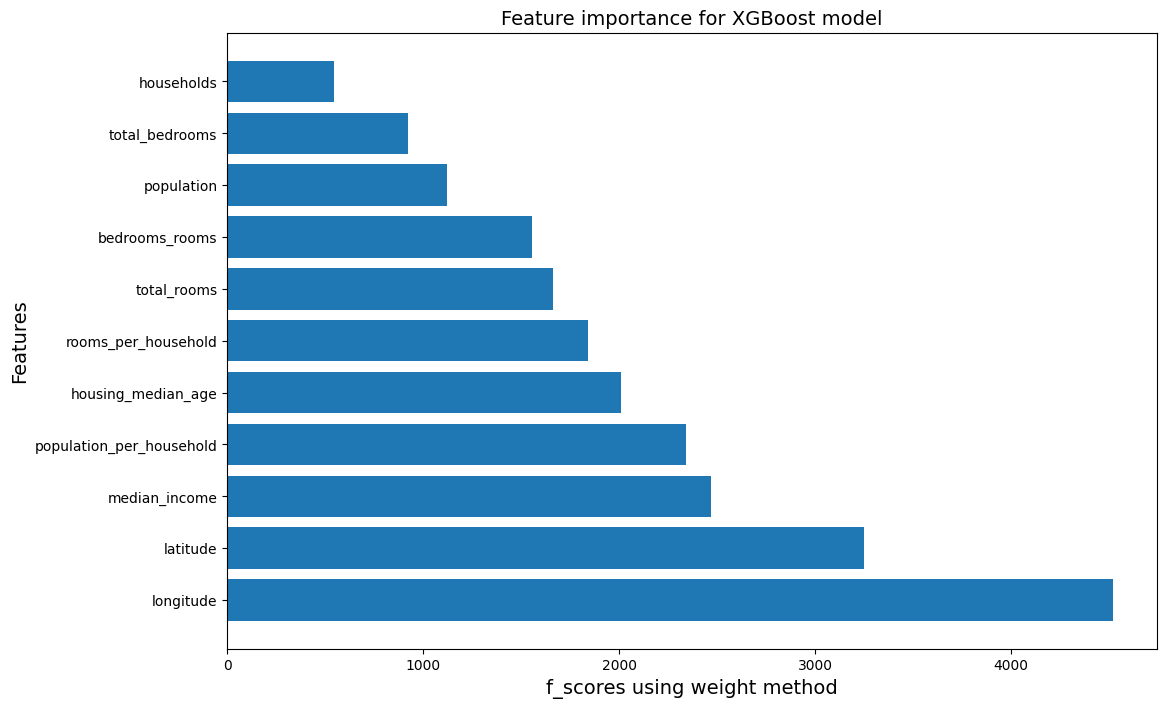

In [107]:
feature_importance_xgb = best_xgb.get_booster().get_score(importance_type='weight') # the same as RF but RF is Normalized
df_feature_importance_xgb = pd.DataFrame.from_dict(feature_importance_xgb, orient='index')
df_feature_importance_xgb = df_feature_importance_xgb.reset_index()
df_feature_importance_xgb = df_feature_importance_xgb.rename(columns={'index': 'Features', 0:'f_scores'})

#taking only the first 11 numerical columns
df_feature_importance_xgb = df_feature_importance_xgb[:11]

#sorting to plot
df_feature_importance_xgb['Features'] = num_cols
df_feature_importance_xgb = df_feature_importance_xgb.sort_values(by='f_scores', ascending=False)

#ploting
plt.figure(figsize=(12,8))
plt.barh(y=df_feature_importance_xgb['Features'], width=df_feature_importance_xgb['f_scores'])
plt.title('Feature importance for XGBoost model', fontsize=14, c='k')
plt.xlabel('f_scores using weight method', fontsize=14, c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.show()

### Model Comparison
### Voting Regressor

In [108]:
from sklearn.ensemble import VotingRegressor

In [109]:
voting_reg = VotingRegressor(estimators=[
                          ('forest', best_forest),
                          ('xgb', best_xgb)
                           ])

voting_reg.fit(X_train_final, y_train)

VotingRegressor(estimators=[('forest',
                             RandomForestRegressor(max_depth=18,
                                                   max_samples=0.9,
                                                   n_estimators=400,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat_threshold=64,
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=8, max_leaves=0,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=150, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, ...))])

In [110]:
neg_mse_scores_voting = cross_val_score(estimator=voting_reg, X=X_train_final, y=y_train, 
                                 cv=5, n_jobs=-1, scoring='neg_mean_squared_error') #sklearn deals with error as negative
mse_scores_voting = -1 * neg_mse_scores_voting
rmse_scores_voting = np.sqrt(mse_scores_voting)
print(f' RMSE Scores using voting --- {np.round(rmse_scores_voting, 4)}')
print(f' Mean of RMSE Scores using voting_reg--- {rmse_scores_voting.mean(): .4f}')

print('*****'* 30)

#Get Predictions using cross_val_predict
y_pred_voting = cross_val_predict(estimator=voting_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
#we can check the RMSE Scores to see what the model predicts and compare it to the Mean of the above results -- almost the same
rmse_pred_voting = np.sqrt(mean_squared_error(y_train, y_pred_voting))
print(f' RMSE Scores after Prediction using voting_reg --- {rmse_pred_voting: .4f}')

C:\Users\1AALI\anaconda3\envs\endproject\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 RMSE Scores using voting --- [45658.1339 48635.9598 47958.3903 46045.2627 47347.0524]
 Mean of RMSE Scores using voting_reg---  47128.9598
******************************************************************************************************************************************************
 RMSE Scores after Prediction using voting_reg ---  47142.4078


#### XGBoost gave us a prediction of 45884.9481 while Voting a prediction of 47142.4078, which means the voting is not really the best for comparison.

### Downloading the best model XGBoost

In [111]:
# Download using joblib
joblib.dump(best_xgb, 'XGBoost_model.pkl')

['XGBoost_model.pkl']

In [115]:
# if we want to use this model later we can simply load it using joblib also
loaded_model = joblib.load('XGBoost_model.pkl')
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Inference on the Test dataset

In [113]:
X_test_final

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06065351, -0.23550335,  0.1123855 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.42526222,  1.0093846 ,  1.85731512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.        ,
         0.        ,  0.        ]])

In [118]:
y_pred_test = loaded_model.predict(X_test_final)

In [120]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

44640.304206671775